# Busqueda por Amplitud




In [9]:
# Busqueda en Amplitud - Breadth First Search
import networkx as nx
import matplotlib.pyplot as plt
# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

['A', 'D', 'F', 'K', 'O']


C:\Users\USER\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


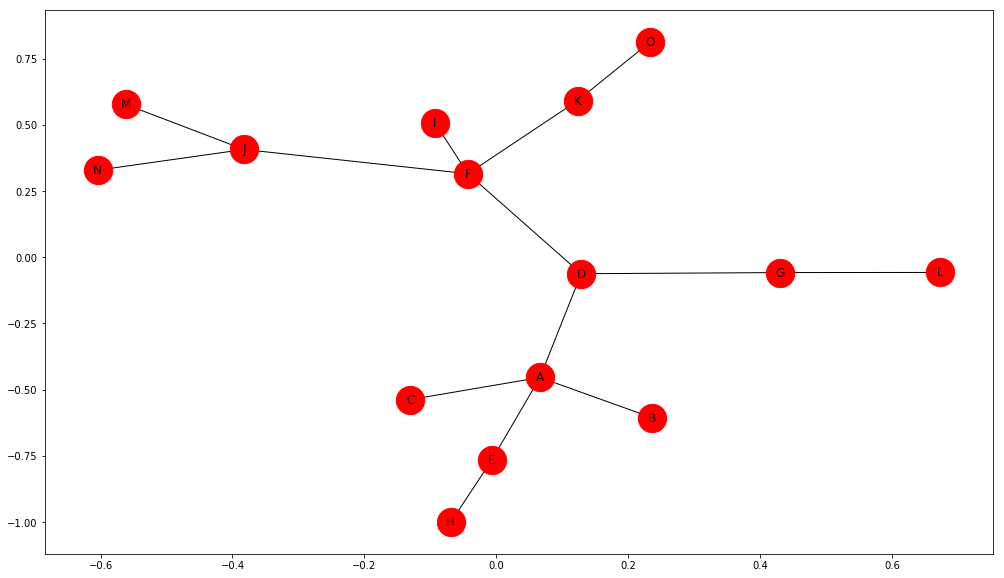

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
def search_Amplitud_solution(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontrs_nodes = [] # Nodos en busqueda o lista nodos

    init_node = Node(init_state) # Nodo inicial
    frontrs_nodes.append(init_node)
    while (not solved) and len(frontrs_nodes) != 0:
        node = frontrs_nodes[0]
        # extraer nodo y añadirlo a visitados
        visited_nodes.append(frontrs_nodes.pop(0))
        if node.data == solution: # Preguntar se el nodo obtenido es la solucion
            solved = True
            return node # Retornamos el nodo de la solucion
        else:
            # expandir nodos hijo - ciudades con conexion
            node_data = node.data
            child_list = []
            for chld in connections[node_data]:
                child = Node(chld)
                child_list.append(child)
                if not child.on_list(visited_nodes) and not child.on_list(frontrs_nodes):
                    frontrs_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections1 = {
        
        #Hospitales
        #'H. Universitario Catolico': {'H. Del Dia', 'H. Antiguo IESS'},
        #'H. Del Dia': {'H. Universitario Catolico', 'H. San Martin De Porres'},
        #'H. Antiguo IESS': {'H. Universitario Catolico', 'H. Militar'},
        #'H. Militar': {'H. Antiguo IESS', 'H. Monte Sinai', 'H. San Juan De Dios', 'H. Vicente Corral Moscoso', 'H. Regional Jose Carrasco'},
        #'H. San Martin De Porres': {'H. Del Dia'},
        #'H. Regional Jose Carrasco': {'H. Militar'},
        #'H. Vicente Corral Moscoso': {'H. Militar'},
        #'H. Monte Sinai':  {'H. Militar'},
        #'H. San Juan De Dios':  {'H. Militar'},
        'A':{'B', 'C', 'D', 'E'},
        'B':{'A'},
        'C':{'A'},
        'D':{'A','F','G'},
        'E':{'A','H'},
        'F':{'D','J','K'},
        'G':{'D','L'},
        'H':{'E'},
        'I':{'F'},
        'J':{'F','N','M'},
        'K':{'F','O'},
        'L':{'G'},
        'N':{'J'},
        'M':{'J'},
        'O':{'K'}
    }

    init_state = 'A'
    solution = 'O'
    solution_node = search_Amplitud_solution(connections1, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    
    grafic = nx.Graph()
    grafic.add_nodes_from(connections1)
    
   
    for key, lista in connections1.items():
        for i in lista:
            grafic.add_edge(key,i)
    plt.figure(3,figsize=(17,10)) 
     
    
    
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        nx.draw_networkx(grafic, witch_label = True, node_size= 800)
        plt.show()
    else:
        print("No hay solucion !!!!")

# Busqueda por Costo


In [11]:
# Busqueda por costo.
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    

In [12]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

['A', 'D', 'F', 'K', 'O']
Costo total: 8.7


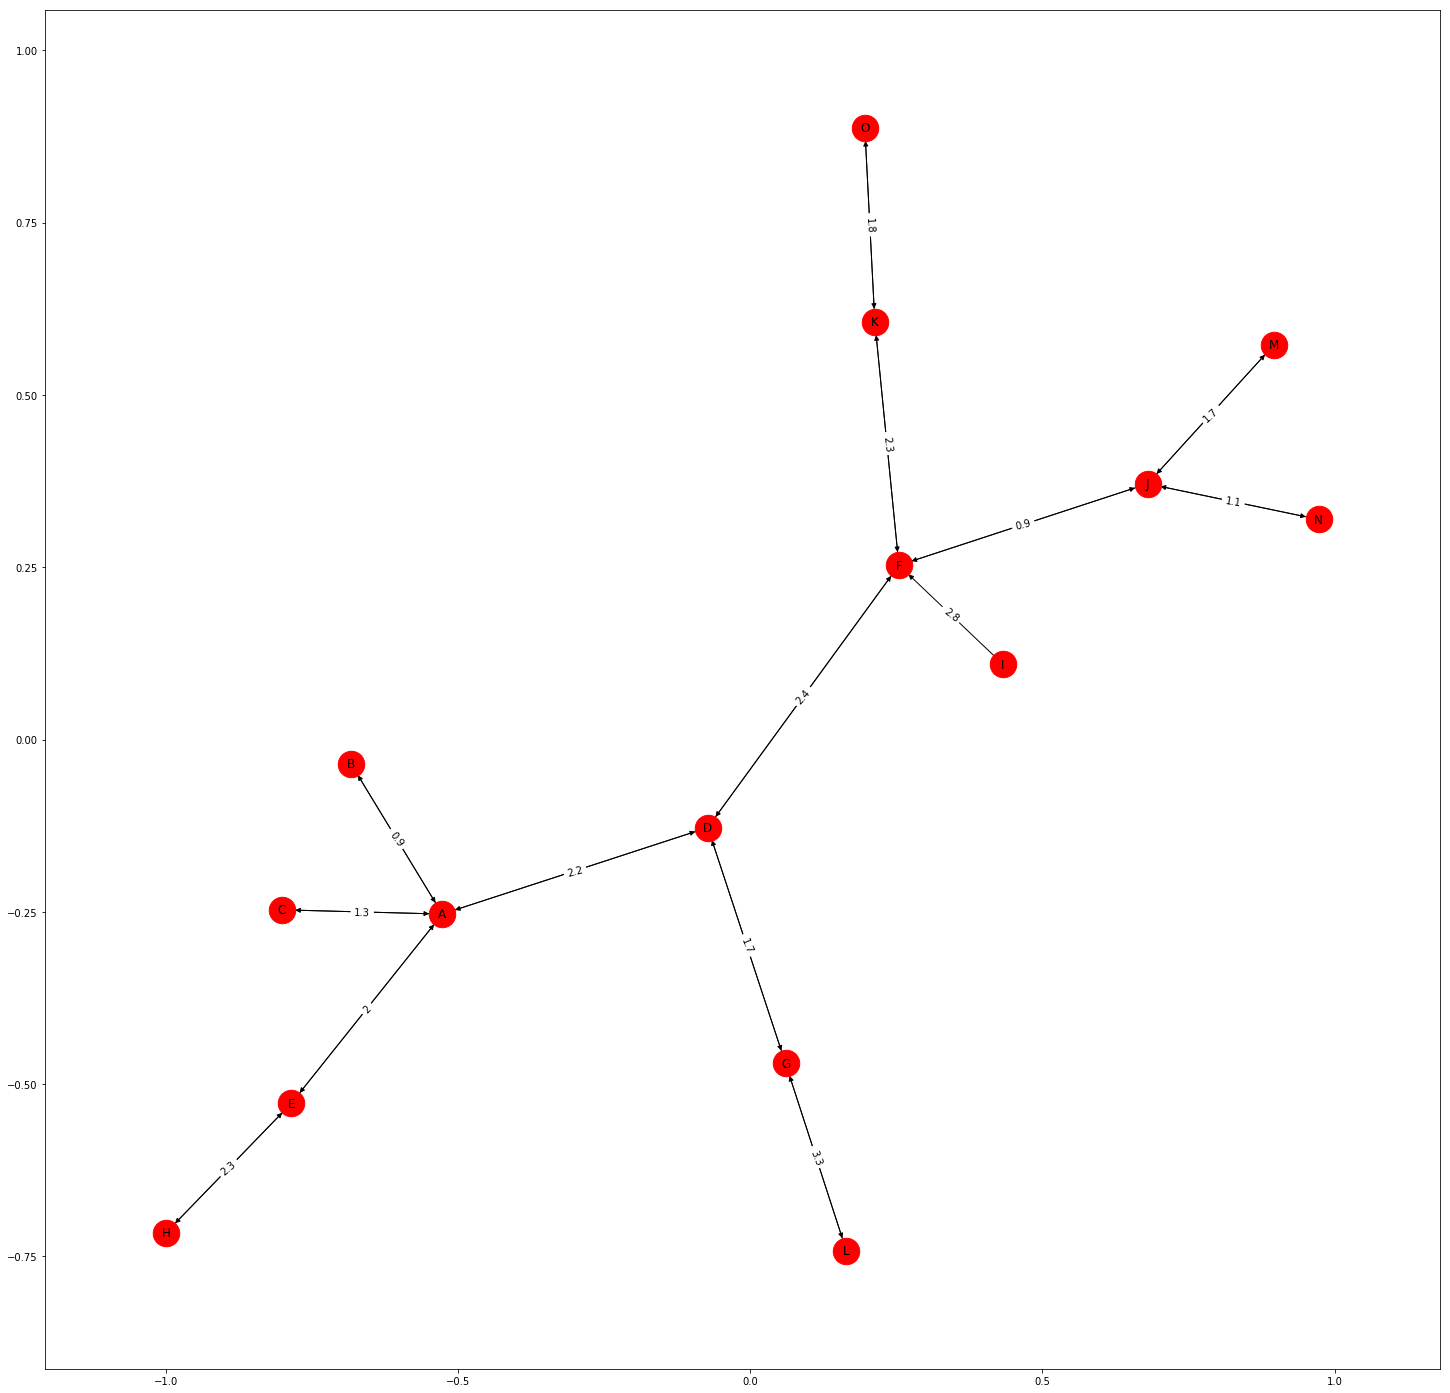

In [13]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        
        'A':{'B':0.9, 'C':1.3, 'D':2.2, 'E':2},
        'B':{'A':0.9},
        'C':{'A':1.3},
        'D':{'A':2.2,'F':2.4,'G':1.7},
        'E':{'A':2,'H':2.3},
        'F':{'D':2.4,'J':0.9,'K':2.3},
        'G':{'D':1.7,'L':3.3},
        'H':{'E':2.3},
        'I':{'F':2.8},
        'J':{'F':0.9,'N':1.1,'M':1.7},
        'K':{'F':2.3,'O':1.8},
        'L':{'G':3.3},
        'N':{'J':1.1},
        'M':{'J':1.7},
        'O':{'K':1.8}
    }

    init_state = 'A'
    solution = 'O'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    
    
    
    def graficarNodos(conectores):
        grafic = nx.DiGraph()
        grafic.add_nodes_from(conectores)
        for key, lista in conectores.items():
            for i in lista:
                grafic.add_edge(key,i, km=str(lista[i])+"")
                
        plt.figure(figsize=(25,25))  
        pos=nx.spring_layout(grafic)
        edge_labels = nx.get_edge_attributes(grafic,'km')   
        nx.draw_networkx_edge_labels(grafic, pos, edge_labels = edge_labels) 
        nx.draw_networkx(grafic, pos, node_size=700, labels={node:node for node in grafic.nodes()})
        plt.show()
    
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr    
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
              
    else:
        print("No hay solucion !!!!")
        
        
    graficarNodos(connections)

# Busqueda por Profundidad

In [35]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [36]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

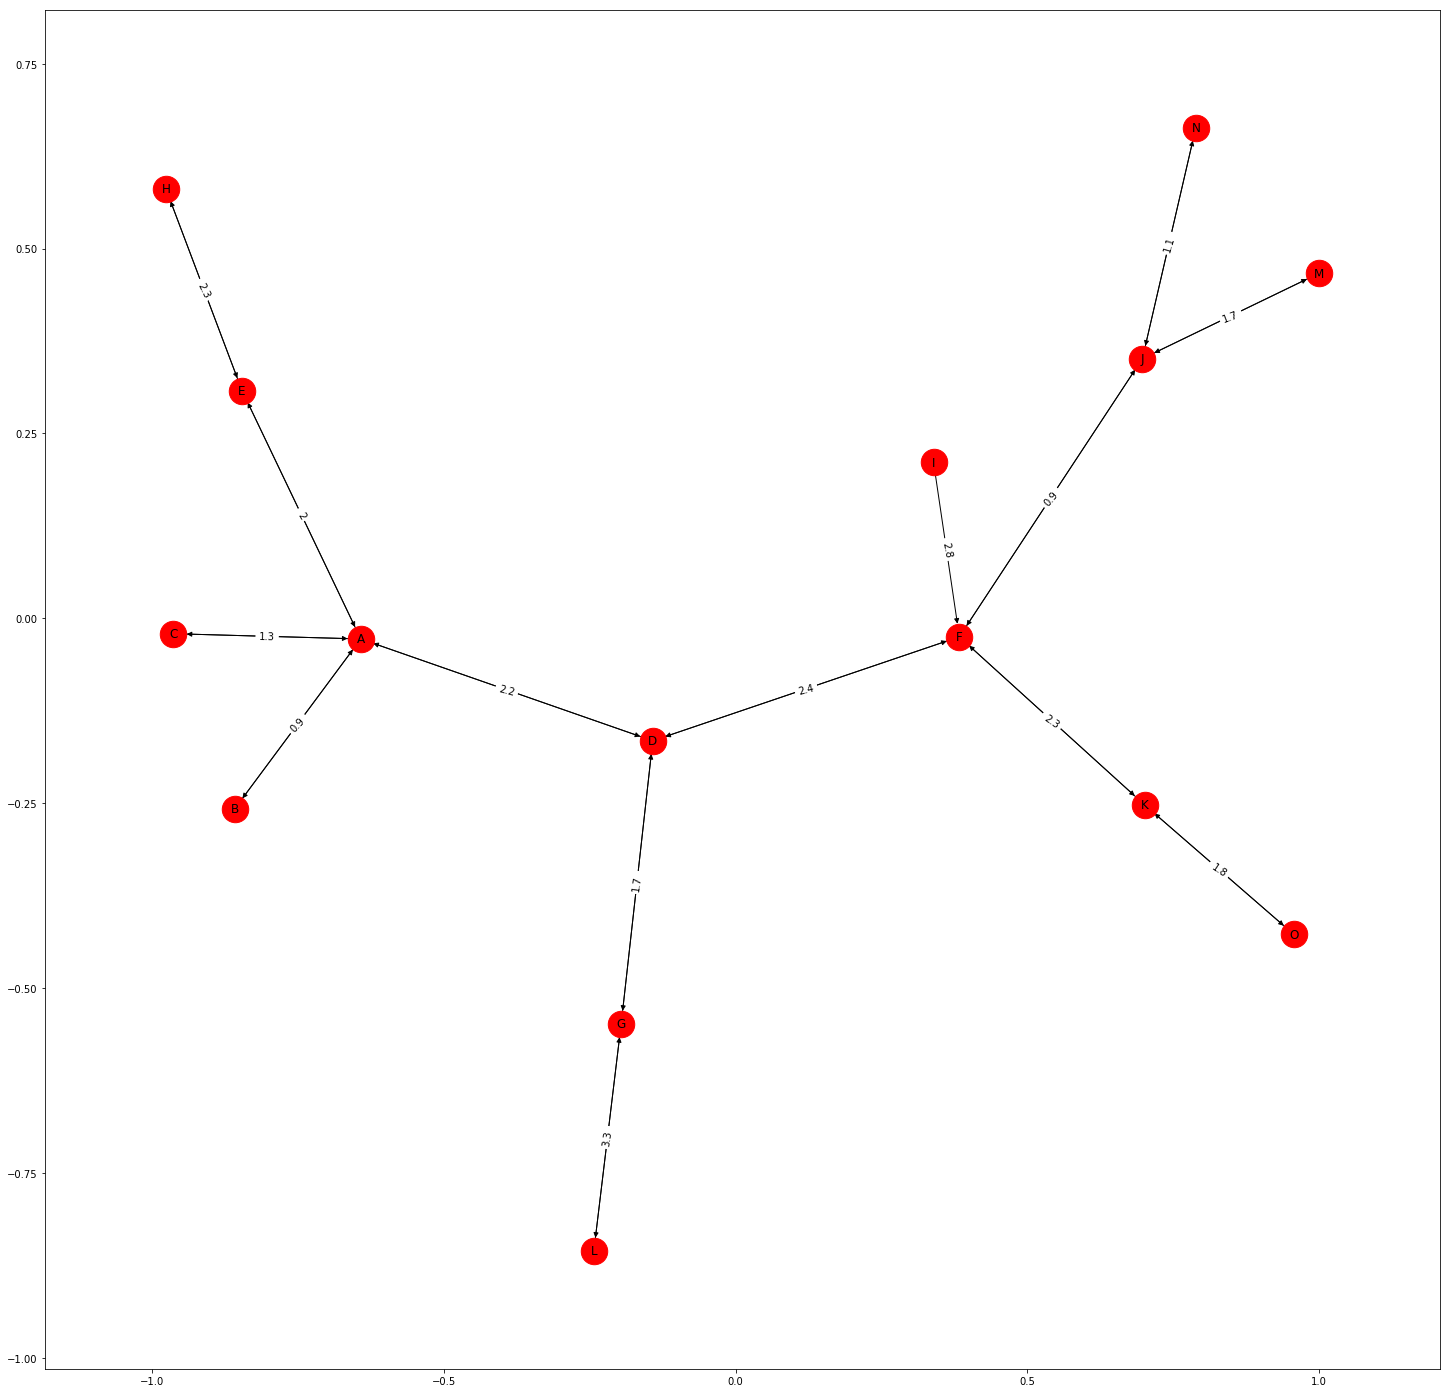

['A', 'D', 'F', 'K', 'O']
Costo total: 15.5


In [37]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
grafic=nx.DiGraph()
def search_profundidad(gra, init_node, solution, visited,costo):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        init_node.cost=costo
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]        
        for node in gra[node_data]:
            child = Node(node)
            cost = gra[node_data][node]
            child.cost=cost
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        
        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                costo=costo+node_son.cost
                #gra.add_edge(init_node.data,node_son,label=costo)
                Solution = search_profundidad(gra, node_son, solution, visited,costo) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None
    
centrosEducativos = {
    'A':{'B':0.9, 'C':1.3, 'D':2.2, 'E':2},
    'B':{'A':0.9},
    'C':{'A':1.3},
    'D':{'A':2.2,'F':2.4,'G':1.7},
    'E':{'A':2,'H':2.3},
    'F':{'D':2.4,'J':0.9,'K':2.3},
    'G':{'D':1.7,'L':3.3},
    'H':{'E':2.3},
    'I':{'F':2.8},
    'J':{'F':0.9,'N':1.1,'M':1.7},
    'K':{'F':2.3,'O':1.8},
    'L':{'G':3.3},
    'N':{'J':1.1},
    'M':{'J':1.7},
    'O':{'K':1.8}
}

def graficarNodos(conectores):
        grafic = nx.DiGraph()
        grafic.add_nodes_from(conectores)
        for key, lista in conectores.items():
            for i in lista:
                grafic.add_edge(key,i, km=str(lista[i])+"")
                
        plt.figure(figsize=(25,25))  
        pos=nx.spring_layout(grafic)
        edge_labels = nx.get_edge_attributes(grafic,'km')   
        nx.draw_networkx_edge_labels(grafic, pos, edge_labels = edge_labels) 
        nx.draw_networkx(grafic, pos, node_size=700, labels={node:node for node in grafic.nodes()})
        plt.show()
        

graficarNodos(centrosEducativos)

init_state = 'A' # Creamos un estado inicial
solution = 'O' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
costo = 0

node = search_profundidad(centrosEducativos, init_node, solution, visited, costo)
result = []

if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() # Reverso el resultado (Solo para presentar)
    print(result)
    print("Costo total: %s" % str(fcosto)) # Imprimir el costo total de llegar al nodo
else:
    print("No hay solucion")